**Цель**: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания**:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [108]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [31]:
df = datasets.fetch_california_housing(as_frame=True).frame
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [32]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
df.shape

(20640, 9)

In [34]:
print(datasets.fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived



---



---



---



# 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков не обнаружено. Все значения числовые, можно продолжать работать с данными.



---



---



---



# 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [36]:
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def rmse_r2(y_train, y_pred_train, y_test, y_pred_test):
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    print(f' RMSE на обучающей выборке: {rmse_train}, RMSE на тестовой: {rmse_test}')
    print(f' R2 на обучающей: {r2_train}, R2 на тестовой: {r2_test}')



---



---



---



# 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

In [38]:
model_log_1 = LinearRegression()
model_log_1.fit(X_train, y_train)

LinearRegression()

In [39]:
m1_predictions_train = model_log_1.predict(X_train)
m1_predictions_test = model_log_1.predict(X_test)
rmse_r2(y_train, m1_predictions_train, y_test, m1_predictions_test)

 RMSE на обучающей выборке: 0.7196757085831575, RMSE на тестовой: 0.7455813830127764
 R2 на обучающей: 0.6125511913966952, R2 на тестовой: 0.5757877060324508


"качество" модели на обучающей выборке 0.613, а на тестовой 0,576



---



---



---



# 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

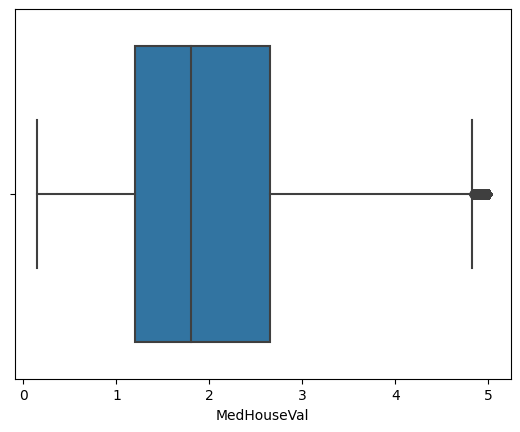

In [50]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sb.boxplot(x=X[i])
    pass

get_boxplot(df, ["MedHouseVal"])

Выбросы мы видим по данному графику. Значения, которые больше 4.8 (примерно) - выбросы, а это 1079 строк

In [29]:
df[df["MedHouseVal"]>4.8]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001




---



---



---



# 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

*   Сделайте выводы
*   Удалите признаки на основании полученных значений, выводов
*   Повторите п. 3, п. 4 на измененных данных

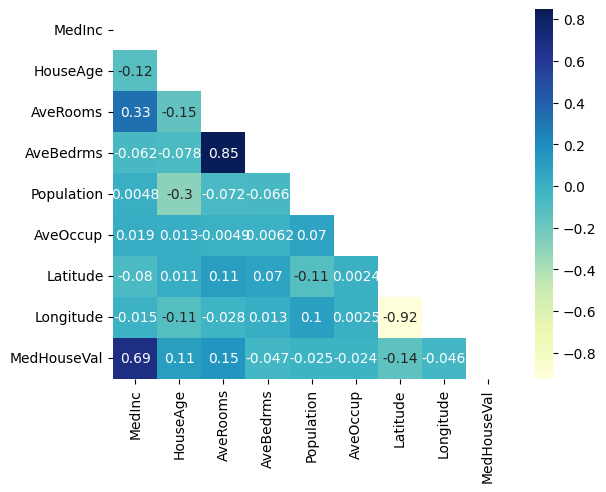

In [44]:
mask = np.triu(np.ones_like(df.corr()))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

Мы видим 2 корреляции с высоким значением: MedHouseVal и MedInc 0,69; AveRooms и AveBedrms 0,85

Попробуем удалить 1, например AveRooms. И посмотреть как изменилось качество модели

In [51]:
df_del_averooms = df.copy()

In [52]:
X2 = df_del_averooms.drop(['MedHouseVal', 'AveRooms'], axis=1)
y2 = df_del_averooms['MedHouseVal']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [53]:
model_log_2 = LinearRegression()
model_log_2.fit(X2_train, y2_train)

LinearRegression()

In [54]:
m2_predictions_train = model_log_2.predict(X2_train)
m2_predictions_test = model_log_2.predict(X2_test)
rmse_r2(y2_train, m2_predictions_train, y2_test, m2_predictions_test)

 RMSE на обучающей выборке: 0.7272420835082767, RMSE на тестовой: 0.7419270782296467
 R2 на обучающей: 0.6043614091244853, R2 на тестовой: 0.5799358837198176


"качество" модели немного ухудшилось: R2 на обучающей было 0.613, а стало 0,604. На тестовой стало немного выше было 0.576, а стало 0,58. Однако, критично ничего не изменилось.



---



---



---



# 7. Исследуйте оставленные признаки на выбросы

*   Удалите выбросы в случае обнаружения
*   Повторите п. 3, п. 4 на измененных данных

In [101]:
df_del_outliers = df[df.MedHouseVal < 4.3] # При этом значении выбросы на графике не визуализируются


In [102]:
df_del_outliers.shape

(19177, 9)

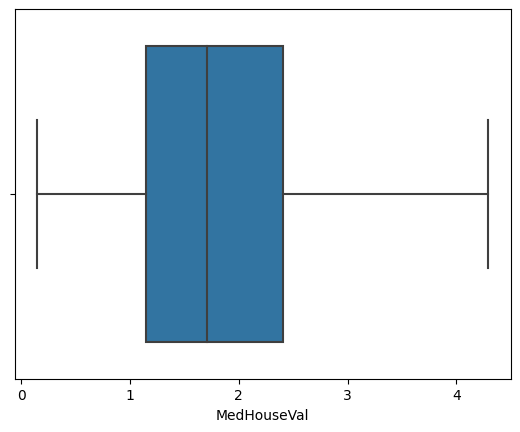

In [103]:
get_boxplot(df_del_outliers, ["MedHouseVal"])

In [104]:
X3 = df_del_outliers.drop(['MedHouseVal'], axis=1)
y3 = df_del_outliers['MedHouseVal']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [105]:
model_log_3 = LinearRegression()
model_log_3.fit(X3_train, y3_train)

LinearRegression()

In [106]:
m3_predictions_train = model_log_3.predict(X3_train)
m3_predictions_test = model_log_3.predict(X3_test)
rmse_r2(y3_train, m3_predictions_train, y3_test, m3_predictions_test)

 RMSE на обучающей выборке: 0.5770985638047331, RMSE на тестовой: 0.5821518236057672
 R2 на обучающей: 0.5744365938950294, R2 на тестовой: 0.5782291597540755


"качество" модели на обучающей выборке понизилось(0,613 против 0,574), а на тестовой фактически не изменилось (0,576 против 0,578)



---



---



---



# 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
*   Повторите п. 3, п. 4 на измененных данных.

Сначала еще раз взглянем на исходные данные:

In [119]:
df_transform = df.copy()

In [120]:
df_transform.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

In [121]:
df_transform['Population'] = np.log(df_transform['Population'])
df_transform['HouseAge'] = np.sqrt(df_transform['HouseAge'])

In [122]:
X4 = df_transform.drop(['MedHouseVal'], axis=1)
y4 = df_transform['MedHouseVal']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [123]:
model_log_4 = LinearRegression()
model_log_4.fit(X4_train, y4_train)

LinearRegression()

In [124]:
m4_predictions_train = model_log_4.predict(X4_train)
m4_predictions_test = model_log_4.predict(X4_test)
rmse_r2(y4_train, m4_predictions_train, y4_test, m4_predictions_test)

 RMSE на обучающей выборке: 0.7206023227887575, RMSE на тестовой: 0.7462415800367103
 R2 на обучающей: 0.6115528342480577, R2 на тестовой: 0.5750361108459132


Существенно опять же, ничего не изменилось



---



---



---



# 9. Сформулируйте выводы по проделанной работе.
*   Кратко опишите какие преобразования были сделаны с данными.
*   Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
*   Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Мы посмотрели как работает модели на следующих данных:


*   Без дополнительной обработки на данных без пропусков
*   Удалили одну из значимых корреляций
*   Удалили выбросы из данных
*   Преобразовали в квадратный корень и логарифмировали



In [136]:
import pandas as pd

tabledata = [["Без дополнительной обработки на данных без пропусков", 0.7197, 0.7456, 0.6126, 0.5758],
         ["Удалили одну из значимых корреляций", 0.7272, 0.7419, 0.6044, 0.5799],
         ["Удалили выбросы из данных", 0.5771, 0.5822, 0.5744, 0.5782],
         ["Преобразовали в квадратный корень и логарифмировали", 0.7206, 0.7462, 0.6116, 0.5750]]

pd.DataFrame(tabledata, columns=["Выборка","RMSE на обучающей выборке", "RMSE на тестовой", "R2 на обучающей", "R2 на тестовой"])


,Выборка,RMSE на обучающей выборке,RMSE на тестовой,R2 на обучающей,R2 на тестовой
0,Без дополнительной обработки на данных без про...,0.7197,0.7456,0.6126,0.5758
1,Удалили одну из значимых корреляций,0.7272,0.7419,0.6044,0.5799
2,Удалили выбросы из данных,0.5771,0.5822,0.5744,0.5782
3,Преобразовали в квадратный корень и логарифмир...,0.7206,0.7462,0.6116,0.5750


Из таблицы видно, что изменения данных могут как улучшить, так и ухудшить предсказания модели (в нашем случае не на "весомые" значения). Однако, если продолжить преобразования, может добавить новые столбцы на основании имеющихся, то предсказания модели можно улучшить, и, возможно, значительно. В целом модели работают, но хотелось бы и лучше.